# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import date

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

today = date.today()


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
unit = 'imperial'
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={unit}&q="
temperature =[]
humidity = []
cloudiness = []
windspeed = []
lat = []
lon = []
foundcities = []
country =[]
date =[]
unit = 'imperial'
for city in cities:
    weathercheck = requests.get(url+city).json()
    
    try:
        foundcities.append(weathercheck["name"])
        temperature.append(weathercheck["main"]["temp_max"])
        humidity.append(weathercheck["main"]["humidity"])
        cloudiness.append(weathercheck["clouds"]["all"])
        windspeed.append(weathercheck["wind"]["speed"])
        lat.append(weathercheck["coord"]["lat"])
        lon.append(weathercheck["coord"]["lon"])
        country.append(weathercheck["sys"]["country"])
        date.append(weathercheck["dt"])
        print(f'{city} found and info added')
    except:
        print(f'{city}: was not found, skipping....')
        pass



qaanaaq found and info added
lagoa found and info added
faanui found and info added
pergamino found and info added
vaitupu: was not found, skipping....
vardo found and info added
si sa ket found and info added
laguna found and info added
mataura found and info added
umzimvubu: was not found, skipping....
bengkulu found and info added
hobart found and info added
airai found and info added
nikolskoye found and info added
cape town found and info added
grindavik found and info added
kodinsk found and info added
north platte found and info added
presidencia roque saenz pena found and info added
attawapiskat: was not found, skipping....
new norfolk found and info added
busselton found and info added
pangnirtung found and info added
ushuaia found and info added
rio verde de mato grosso found and info added
tromso found and info added
barentsburg: was not found, skipping....
tuktoyaktuk found and info added
harboore found and info added
lompoc found and info added
iqaluit found and info added

indianola found and info added
nawada found and info added
casa nova found and info added
masvingo found and info added
bonthe found and info added
haines junction found and info added
les cayes found and info added
balabac found and info added
lolua: was not found, skipping....
yellowknife found and info added
andenes found and info added
saleaula: was not found, skipping....
provideniya found and info added
nefteyugansk found and info added
kushmurun found and info added
worland found and info added
fukue found and info added
hami found and info added
kloulklubed found and info added
adrar found and info added
labelle found and info added
crailsheim found and info added
toora-khem found and info added
antofagasta found and info added
kruisfontein found and info added
sembakung found and info added
durham found and info added
byron bay found and info added
bowen found and info added
manono found and info added
rio gallegos found and info added
hamilton found and info added
domodossola

manyana found and info added
akyab found and info added
yakeshi found and info added
yuanping found and info added
portland found and info added
mutsamudu: was not found, skipping....
kunming found and info added
kroya found and info added
muros found and info added
san andres found and info added
togur found and info added
atasu found and info added
poum found and info added
ameca found and info added
mama found and info added
safaga found and info added
borba found and info added
vitim found and info added
ilulissat found and info added
robertsport found and info added
olafsvik found and info added
henties bay found and info added
yeppoon found and info added
wawa found and info added
kharan found and info added
puerto escondido found and info added
sur found and info added
husavik found and info added
banda aceh found and info added
salinopolis found and info added
riviere-au-renard found and info added
southampton found and info added
dehloran found and info added
umm durman: was n

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
CityWeather_df = pd.DataFrame({"City": foundcities,
                               "Country": country,
                                "Temperature": temperature,
                                "Humidity": humidity,
                                "Cloudiness": cloudiness,
                                "Windspeed":windspeed,
                                "Date": date,
                                "Longitude": lon,
                                "Latitude": lat
                               }
                              )


In [5]:
CityWeather_df.to_csv(r'/Users/specky3512/GitHub/python-API-challenge/output_data/CityWeather.csv', index = False)

CityWeather_df

,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Date,Longitude,Latitude
0,Qaanaaq,GL,28.51,95,25,0.34,1592448407,-69.36,77.48
1,Lagoa,PT,62.65,79,94,7.09,1592448407,-27.98,39.05
2,Faanui,PF,81.81,73,98,1.21,1592448407,-151.75,-16.48
3,Pergamino,AR,55.00,93,100,11.99,1592448407,-60.57,-33.89
4,Vardø,NO,46.69,77,3,8.39,1592448407,31.11,70.37
...,...,...,...,...,...,...,...,...,...
561,Cody,US,46.40,81,1,8.05,1592448459,-109.06,44.53
562,Maniitsoq,GL,36.23,83,3,7.65,1592448459,-52.90,65.42
563,Qandala,SO,89.55,48,100,10.49,1592448459,49.87,11.47
564,Port Lincoln,AU,62.91,52,100,19.26,1592448459,135.87,-34.73


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
toohumid = CityWeather_df.loc[CityWeather_df['Humidity'] > 100]


In [7]:
#  Get the indices of cities that have humidity over 100%.
print(f'There are {len(toohumid)} entries with humidity over 100%')

There are 0 entries with humidity over 100%


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
counts = CityWeather_df.count()
countsinfo = CityWeather_df.describe()
print(counts)
countsinfo


City           566
Country        566
Temperature    566
Humidity       566
Cloudiness     566
Windspeed      566
Date           566
Longitude      566
Latitude       566
dtype: int64


,Temperature,Humidity,Cloudiness,Windspeed,Date,Longitude,Latitude
count,566.000000,566.000000,566.000000,566.000000,5.660000e+02,566.000000,566.000000
mean,67.324258,69.480565,49.803887,8.012527,1.592448e+09,21.328816,19.757208
std,14.110626,20.478406,39.093789,5.214737,5.804703e+01,92.537886,33.350974
min,23.000000,8.000000,0.000000,0.340000,1.592448e+09,-179.170000,-54.800000
25%,57.200000,58.000000,5.250000,4.275000,1.592448e+09,-63.492500,-8.330000
50%,68.000000,73.000000,51.500000,6.990000,1.592448e+09,27.445000,23.370000
75%,78.800000,85.000000,90.000000,10.932500,1.592448e+09,105.027500,47.507500
max,96.800000,100.000000,100.000000,28.860000,1.592448e+09,179.320000,78.220000


In [9]:
# Extract relevant fields from the data frame
scatterplotdata = CityWeather_df[['City', 'Latitude', 'Temperature', 'Humidity', 'Cloudiness', 'Windspeed']]

# Export the City_Data into a csv
scatterplotdata.to_csv(r'/Users/specky3512/GitHub/python-API-challenge/output_data/DataforScatterplots.csv', index = False)

scatterplotdata.head(20)

,City,Latitude,Temperature,Humidity,Cloudiness,Windspeed
0,Qaanaaq,77.48,28.51,95,25,0.34
1,Lagoa,39.05,62.65,79,94,7.09
2,Faanui,-16.48,81.81,73,98,1.21
3,Pergamino,-33.89,55.00,93,100,11.99
4,Vardø,70.37,46.69,77,3,8.39
5,Si Sa Ket,15.11,82.99,81,100,10.74
6,Laguna,38.42,87.80,16,1,14.99
7,Mataura,-46.19,44.87,75,0,3.09
8,Bengkulu,-3.80,84.36,64,67,2.24
9,Hobart,-42.88,45.00,70,42,6.93


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

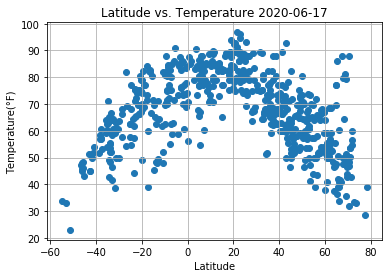

In [42]:
today = date.today()
x = scatterplotdata['Latitude']
y1 = scatterplotdata['Temperature']
plt.scatter(x,y1)
plt.xlabel('Latitude')
plt.ylabel('Temperature(°F)')
plt.title(f'Latitude vs. Temperature {today}')
plt.grid()
plt.savefig(f'../output_data/Latitude vs. Temperature {today}.png')
plt.show()


## Latitude vs. Humidity Plot

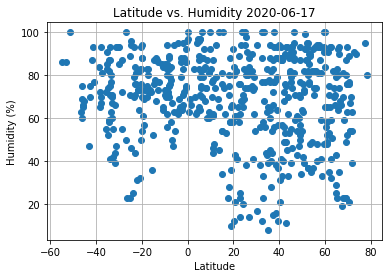

In [43]:
y2 = scatterplotdata['Humidity']
plt.scatter(x,y2)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Latitude vs. Humidity {today}')
plt.grid()
plt.savefig(f'../output_data/Latitude vs. Humidity {today}.png')
plt.show()


## Latitude vs. Cloudiness Plot

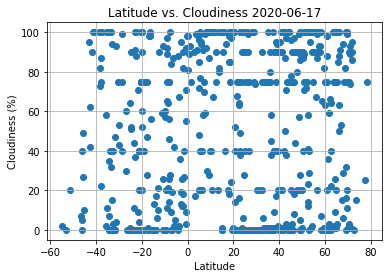

In [44]:
y3 = scatterplotdata['Cloudiness']
plt.scatter(x,y3)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'Latitude vs. Cloudiness {today}')
plt.grid()
plt.savefig(f'../output_data/Latitude vs. Cloudiness {today}.png')
plt.show()

## Latitude vs. Wind Speed Plot

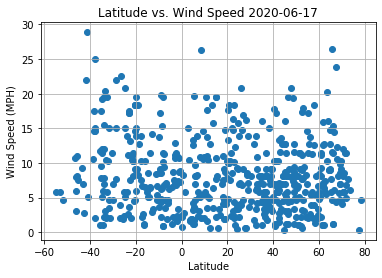

In [45]:
y4 = scatterplotdata['Windspeed']
plt.scatter(x,y4)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.title(f'Latitude vs. Wind Speed {today}')
plt.grid()
plt.savefig(f'../output_data/Latitude vs. Wind Speed {today}.png')


plt.show()

## Linear Regression

In [46]:
# OPTIONAL: Create a function to create Linear Regression plots
def linerarregress(x,y,a,b,c):
    (slope, intercept, rvalue, pvalue, stderr)=linregress(x,y)
    regress_values = x * slope + intercept
    line_eq = 'y=' + str(round(slope,2)) +'x+' + str(round(intercept,2))
    plt.scatter(x,y, color='blue')
    plt.plot(x,regress_values,"r-")
    print(f'The r-square is {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(a,b),fontsize=15, color='red')
    plt.grid()
    plt.xlabel('Latitude')
    plt.ylabel(f'{c}')

In [33]:
# Create Northern and Southern Hemisphere DataFrames
Northern = scatterplotdata[scatterplotdata['Latitude'] >= 0]

Southern = scatterplotdata[scatterplotdata['Latitude'] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-square is -0.7204990339725479
y=-0.52x+88.3


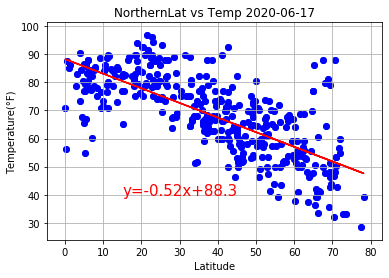

In [64]:
x_north = Northern["Latitude"]
y_nTemp = Northern["Temperature"]
plt.scatter(x_north,y_nTemp)
plt.title(f'NorthernLat vs Temp {today}')
linerarregress(x_north,y_nTemp,15,40,"Temperature(°F)")
plt.savefig(f'../output_data/NorthernLat vs Temp {today}.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-square is 0.7049152626909974
y=0.7x+80.59


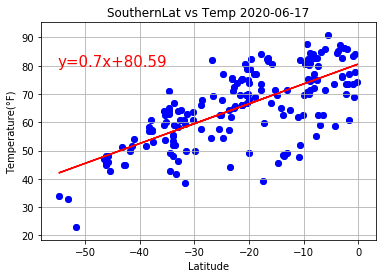

In [65]:
x_south = Southern["Latitude"]
y_sTemp = Southern["Temperature"]
plt.scatter(x_south, y_sTemp)
plt.title(f'SouthernLat vs Temp {today}')
linerarregress(x_south, y_sTemp,-55,80,"Temperature(°F)")
plt.savefig(f'../output_data/SouthernLat vs Temp {today}.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-square is -0.0771013960625826
y=-0.09x+71.27


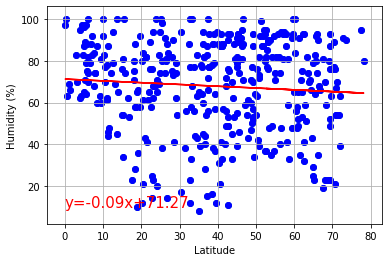

In [49]:
y_nHum = Northern["Humidity"]
plt.scatter(x_north, y_nHum)
plt.title(f'NorthernLat vs Humidity {today}')
linerarregress(x_north, y_nHum,0,10,'Humidity (%)')
plt.savefig(f'../output_data/NorthernLat vs Humidity {today}.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-square is 0.08645058939838988
y=0.1x+74.94


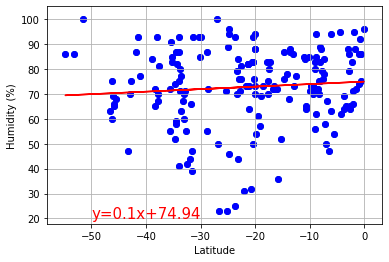

In [50]:
y_sHum=Southern["Humidity"]
plt.scatter(x_south,y_sHum)
plt.title(f'SouthernLat vs Humidity {today}')
linerarregress(x_south,y_sHum,-50,20,'Humidity (%)')
plt.savefig(f'../output_data/SouthernLat vs Humidity {today}.png')
plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-square is -0.114122043681605
y=-0.23x+61.63


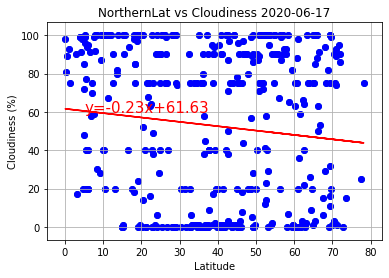

In [61]:
y_nClo = Northern["Cloudiness"]
plt.scatter(x_north,y_nClo)
plt.title(f'NorthernLat vs Cloudiness {today}')
linerarregress(x_north,y_nClo,5,60,"Cloudiness (%)")
plt.savefig(f'../output_data/NorthernLat vs Cloudiness {today}.png')
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-square is -0.008566887954493046
y=-0.02x+42.87


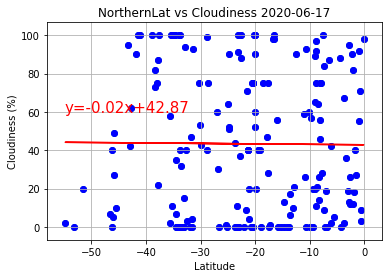

In [62]:
y_sClo = Southern["Cloudiness"]
plt.scatter(x_south,y_sClo)
plt.title(f'SouthernLat vs Cloudiness {today}')
linerarregress(x_south,y_sClo,-55,60,"Cloudiness (%)")
plt.savefig(f'../output_data/SouthernLat vs Cloudiness {today}.png')
plt.show()


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-square is 0.02791478753181469
y=0.01x+7.32


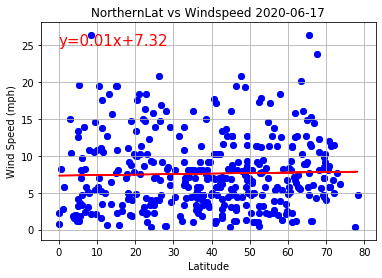

In [63]:
y_nWind= Northern["Windspeed"]
plt.scatter(x_north, y_nWind)
plt.title(f'NorthernLat vs Wind Speed {today}')
linerarregress(x_north, y_nWind,0,25, "Wind Speed (mph)")
plt.savefig(f'../output_data/NorthernLat vs WindSpeed {today}.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-square is -0.16435167143041302
y=-0.07x+7.44


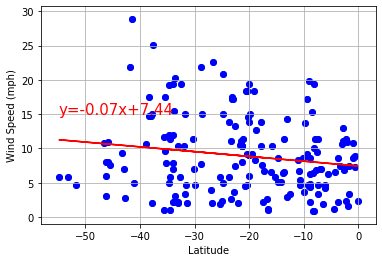

In [54]:
y_sWind = Southern["Windspeed"]
plt.scatter(x_south, y_sWind)
plt.title(f'SouthernLat vs Wind Speed {today}')
linerarregress(x_south, y_sWind,-55,15,"Wind Speed (mph)")
plt.savefig(f'../output_data/SouthernLat vs Windspeed {today}.png')
plt.show()